# All Frames below obtained from ATD-12K Dataset: 
Github: https://github.com/lisiyao21/AnimeInterp


(540, 960, 3)


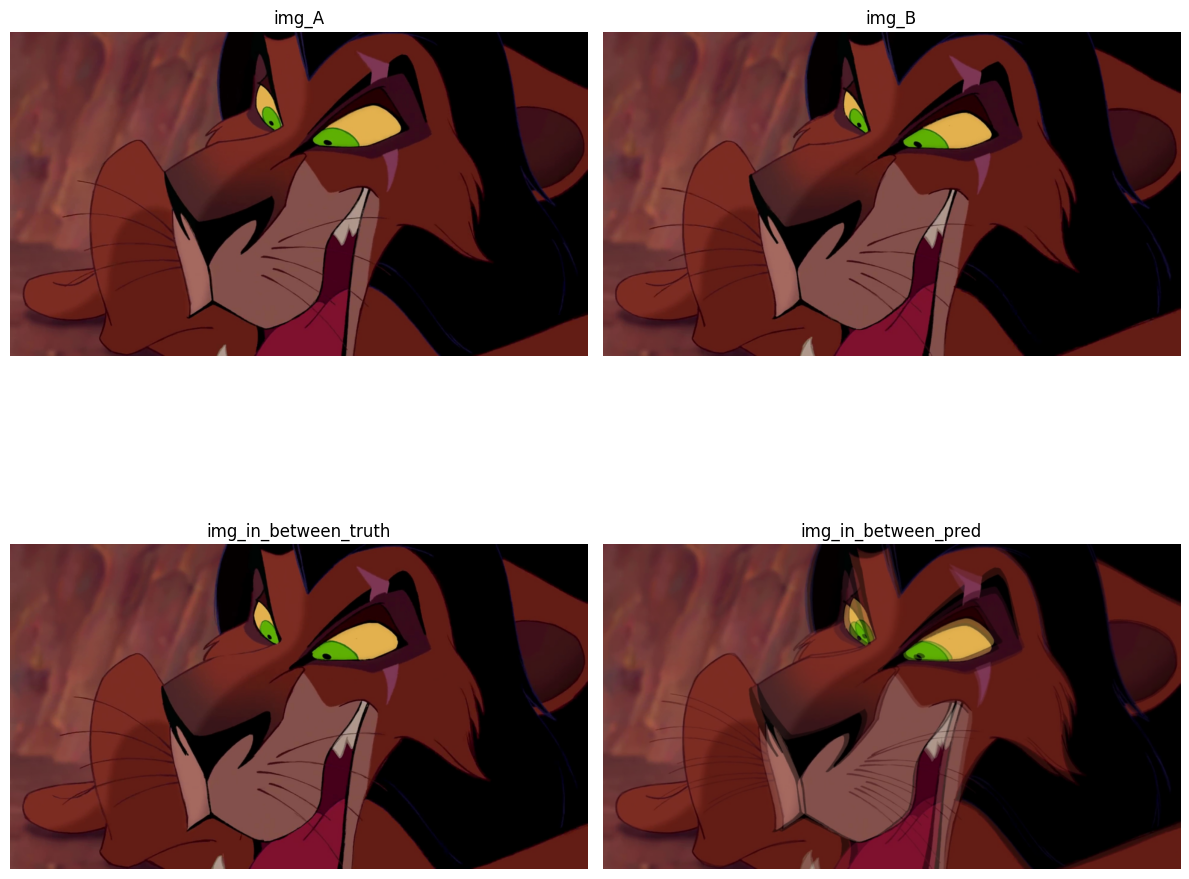

In [8]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img_A = cv2.imread("/Users/akshaanahuja/KeyframeGenerator/KeyframeGenerator/data/raw/datasets/test_2k_540p/Disney_v4_0_000024_s2/frame1.png")
img_B = cv2.imread("/Users/akshaanahuja/KeyframeGenerator/KeyframeGenerator/data/raw/datasets/test_2k_540p/Disney_v4_0_000024_s2/frame3.png")
img_in_between_truth = cv2.imread("/Users/akshaanahuja/KeyframeGenerator/KeyframeGenerator/data/raw/datasets/test_2k_540p/Disney_v4_0_000024_s2/frame2.png")

print(img_A.shape)
img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB)
img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
img_in_between_truth = cv2.cvtColor(img_in_between_truth, cv2.COLOR_BGR2RGB)

img_in_between_pred = cv2.addWeighted(img_A, 0.5, img_B, 0.5, 0)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(img_A)
axes[0, 0].set_title("img_A")
axes[0, 0].axis('off')
axes[0, 1].imshow(img_B)
axes[0, 1].set_title("img_B")
axes[0, 1].axis('off')
axes[1, 0].imshow(img_in_between_truth)
axes[1, 0].set_title("img_in_between_truth")
axes[1, 0].axis('off')
axes[1, 1].imshow(img_in_between_pred)
axes[1, 1].set_title("img_in_between_pred")
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


# above is the worst case, "cross-dissolve" to try and find an in between frame. It takes the average of the two frames.

(540, 960, 2)
[[[-2.90507955e-07 -8.77841958e-05]
  [-3.38372010e-05 -1.45141879e-04]
  [-5.91371791e-05 -2.09344347e-04]
  ...
  [-1.71825872e-29  5.76926007e-30]
  [-1.71825872e-29  5.76926007e-30]
  [-1.71825872e-29  5.76926007e-30]]

 [[-2.22507460e-05 -1.44783393e-04]
  [-6.08061673e-05 -2.19380323e-04]
  [-8.71475568e-05 -2.97714549e-04]
  ...
  [-2.72189817e-30 -1.22627684e-29]
  [-2.72189817e-30 -1.22627684e-29]
  [-2.72189817e-30 -1.22627684e-29]]

 [[-5.65742812e-05 -2.50940386e-04]
  [-9.60606994e-05 -3.35711229e-04]
  [-1.19614582e-04 -4.27658873e-04]
  ...
  [-2.36065160e-29 -2.84442429e-29]
  [-2.36065160e-29 -2.84442429e-29]
  [-2.36065160e-29 -2.84442429e-29]]

 ...

 [[ 4.29176434e-05  6.31819203e-05]
  [ 7.02964317e-05  8.33523081e-05]
  [ 9.29863672e-05  1.00867088e-04]
  ...
  [ 2.14229998e-14  1.25623490e-14]
  [ 1.05043317e-14  9.78793242e-15]
  [-2.42153400e-15  8.00883035e-15]]

 [[ 4.42353194e-05  5.39971843e-05]
  [ 7.30258398e-05  7.10230597e-05]
  [ 9.075521

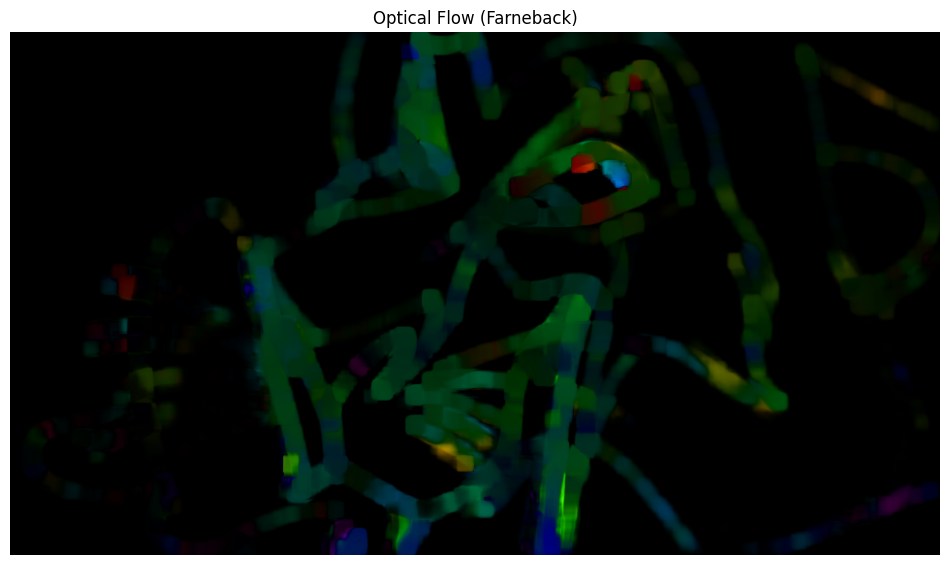

In [11]:
# farneback optical flow
"""
Optical Flow Visualization Notes (Farnebäck + HSV → RGB)

We compute dense optical flow between prev_gray and next_gray.
`flow` is an H×W×2 array where:
    flow[...,0] = horizontal motion (dx)
    flow[...,1] = vertical motion (dy)

For visualization, we convert flow to an HSV image:
    - H (hue) encodes motion direction (angle)
    - S (saturation) is fixed at max → vivid colors
    - V (value) encodes motion magnitude (speed)

Detailed meaning:
    H = angle of motion vector
        = arctan2(dy, dx), mapped into [0,180] for OpenCV
        → hue (color) indicates direction:
            red    = ~0° / horizontal (right)
            yellow = ~60°
            green  = ~120° / vertical
            cyan   = ~180°
            blue/magenta represent opposite directions, etc.

    V = sqrt(dx^2 + dy^2)
        → brightness = magnitude (faster = brighter)

    S = 255 (fixed)
        → ensures strong color

Interpretation:
    - Bright pixels = high motion
    - Dark pixels = little/no motion
    - Different colors = different motion directions
    - Color does NOT correspond to original image colors

Notes:
    - Flow is only reliable on textured / high-contrast regions.
    - Line art may produce noisy flow in flat regions.
    - This is a visualization; real processing should use `flow` vectors directly.
"""

prev = img_A
next_im = img_B
prev_gray = cv2.cvtColor(prev, cv2.COLOR_RGB2GRAY)
next_gray = cv2.cvtColor(next_im, cv2.COLOR_RGB2GRAY)

flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

print(flow.shape)
print(flow)

# Visualize optical flow as an RGB image
hsv = np.zeros_like(prev)
hsv[..., 1] = 255

mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(flow_rgb)
plt.title("Optical Flow (Farneback)")
plt.axis('off')
plt.show()

